In [14]:
import pandas as pd
df = pd.read_csv("converted.csv")



In [15]:
df.head()

,Date,Description,Amount,Type
0,04-04-2025,UPI/dhanrajcool09-1/UPI/BANK OF\rINDIA/1025563...,60.0,DR
1,03-04-2025,UPI/8763311741@navi/UPI/State\rBank Of\rI/5459...,80.0,DR
2,03-04-2025,UPI/q930168267@ybl/UPI/YES\rBANK\rLIMITE/50931...,90.0,DR
3,03-04-2025,UPI/paytm.d11285986/UPI/YES\rBANK\rPTY/5093162...,25.0,DR
4,03-04-2025,UPI/spotify.bdsi@ic/MandateReque\rst/ICICI Ban...,59.0,DR


In [16]:
df['UPI ID'] = df['Description'].str.extract(r'UPI/([^/]+)/')


In [17]:
df.drop(["Description"], axis = 1, inplace = True)

In [18]:
df.head()

,Date,Amount,Type,UPI ID
0,04-04-2025,60.0,DR,dhanrajcool09-1
1,03-04-2025,80.0,DR,8763311741@navi
2,03-04-2025,90.0,DR,q930168267@ybl
3,03-04-2025,25.0,DR,paytm.d11285986
4,03-04-2025,59.0,DR,spotify.bdsi@ic


In [19]:
df['UPI ID'].unique()

array(['dhanrajcool09-1', '8763311741@navi', 'q930168267@ybl',
       'paytm.d11285986', 'spotify.bdsi@ic', 'q775938038@ybl',
       'paytmqr28100505', 'aptextilespvtlt', '7974720425@navi',
       'hiox2004@okicic', 'ameyabakshi09@o', '9810631989@ptsb',
       'paytm.s12t4fi@p', 'q758024703@ybl', 'paytmqr5zir4g@p',
       'bharatpe907h7g2', 'q479695017@ybl', 'vyapar.16814142',
       'q403933972@ybl', '966757327@ibl', '9810631989@pthd',
       'paytmqr5w271n@p', '8824988419@ybl', 'bharatpe907e7h2', nan,
       'burgerfarmindia', '9579956189@ptax', 'q270917636@ybl',
       'paytm.s12d6ab@p', 'paytmqr5jtzjb@p', '9579956189@pthd',
       '9579956189@ptsb', 'paytm.s127u0z@p', 'paytmqr631hi5@p',
       '9810631989@ptye', 'paytmqr1jqz470z', '8296868208@ptax',
       'q673970063@ybl', 'bharatpe.9w0u0w', '9899657105@ptsb',
       'zoro.sanji12op@', 'paytmqr1at2zpmt', 'paytmqr10e79o@p',
       'paytmqr171eddzx', 'paytm.s101k8r@p', 'lizalmn14@okhdf',
       '9899657105@pthd', 'paytra1599@ptyb', 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    152 non-null    object 
 1   Amount  152 non-null    float64
 2   Type    152 non-null    object 
 3   UPI ID  151 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


In [22]:
df['UPI ID'].fillna("Not a UPI Transaction", inplace=True)


C:\Users\Rushil Misra\AppData\Local\Temp\ipykernel_19140\3458004630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UPI ID'].fillna("Not a UPI Transaction", inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    152 non-null    object 
 1   Amount  152 non-null    float64
 2   Type    152 non-null    object 
 3   UPI ID  152 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


In [24]:
df.head()

,Date,Amount,Type,UPI ID
0,04-04-2025,60.0,DR,dhanrajcool09-1
1,03-04-2025,80.0,DR,8763311741@navi
2,03-04-2025,90.0,DR,q930168267@ybl
3,03-04-2025,25.0,DR,paytm.d11285986
4,03-04-2025,59.0,DR,spotify.bdsi@ic


In [25]:
df['Type'].unique()

array(['DR', 'CR'], dtype=object)

In [42]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [44]:
df.dtypes

Date      datetime64[ns]
Amount           float64
Type              object
UPI ID            object
dtype: object

In [45]:
df['Day_Number'] = df['Date'].dt.day


In [46]:
df.head()

,Date,Amount,Type,UPI ID,Day_Number
0,2025-04-04,60.0,DR,dhanrajcool09-1,4
1,2025-04-03,80.0,DR,8763311741@navi,3
2,2025-04-03,90.0,DR,q930168267@ybl,3
3,2025-04-03,25.0,DR,paytm.d11285986,3
4,2025-04-03,59.0,DR,spotify.bdsi@ic,3


In [47]:
df.drop(['Date'],axis =1, inplace = True)

In [26]:
df_debit = df[df['Type'] == "DR"]
df_credit = df[df["Type"] == 'CR']


In [27]:
df_debit.head()

,Date,Amount,Type,UPI ID
0,04-04-2025,60.0,DR,dhanrajcool09-1
1,03-04-2025,80.0,DR,8763311741@navi
2,03-04-2025,90.0,DR,q930168267@ybl
3,03-04-2025,25.0,DR,paytm.d11285986
4,03-04-2025,59.0,DR,spotify.bdsi@ic


In [48]:
df.dtypes

Amount        float64
Type           object
UPI ID         object
Day_Number      int32
dtype: object

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

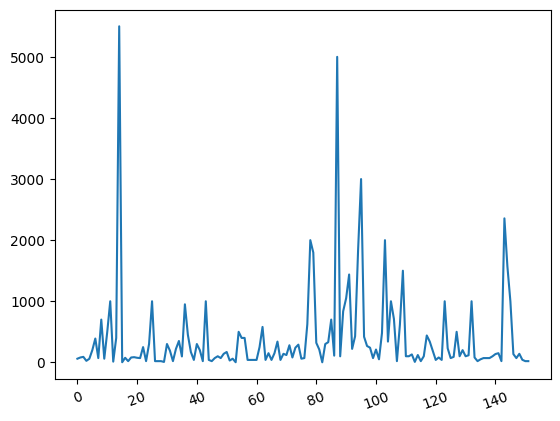

<Figure size 2000x2000 with 0 Axes>

In [35]:
plt.plot(df["Amount"])
plt.xticks(rotation=20)
plt.figure(figsize = (20, 20))
plt.show()

In [65]:
df_debit_val = pd.DataFrame()
df_debit_val['Day_number'] = df['Day_Number']
df_debit_val['Amount'] = df['Amount']
df_debit_val.head()

,Day_number,Amount
0,4,60.0
1,3,80.0
2,3,90.0
3,3,25.0
4,3,59.0


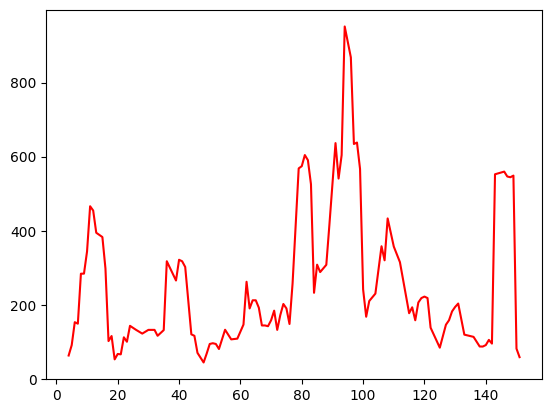

In [69]:
rollingseries = df_debit['Amount'].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()

In [71]:
from statsmodels.tsa.holtwinters import Holt


In [77]:
import numpy as np
np.asarray(df_debit_val)

array([[4.00000e+00, 6.00000e+01],
       [3.00000e+00, 8.00000e+01],
       [3.00000e+00, 9.00000e+01],
       [3.00000e+00, 2.50000e+01],
       [3.00000e+00, 5.90000e+01],
       [2.00000e+00, 2.00000e+02],
       [2.00000e+00, 3.90000e+02],
       [2.00000e+00, 7.00000e+01],
       [2.00000e+00, 7.00000e+02],
       [2.00000e+00, 6.00000e+01],
       [2.00000e+00, 5.00000e+02],
       [2.00000e+00, 1.00000e+03],
       [2.00000e+00, 1.20000e+01],
       [1.00000e+00, 4.00000e+02],
       [1.00000e+00, 5.50000e+03],
       [1.00000e+00, 2.00000e+00],
       [1.00000e+00, 7.50000e+01],
       [1.00000e+00, 2.00000e+01],
       [1.00000e+00, 8.00000e+01],
       [3.10000e+01, 8.50000e+01],
       [3.10000e+01, 7.50000e+01],
       [3.10000e+01, 7.00000e+01],
       [3.10000e+01, 2.50000e+02],
       [3.10000e+01, 2.00000e+01],
       [3.10000e+01, 3.00000e+02],
       [3.10000e+01, 1.00000e+03],
       [2.90000e+01, 2.00000e+01],
       [2.90000e+01, 2.00000e+01],
       [2.90000e+01,

In [78]:
fit1 = Holt(df_debit_val).fit()  #linear trend
fit2 = Holt(df_debit_val, exponential=True).fit()  #exponential trend
plt.plot(df_debit_val, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()

ValueError: endog is required to have ndim 1 but has ndim 2